In [1]:
import Bio as Bio
import matplotlib
import pylab

from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio import SeqUtils
from matplotlib import pyplot as plt
from Bio import AlignIO
from Bio.Align import AlignInfo
from Bio.Seq import Seq #imports the Seq library
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Phylo import TreeConstruction
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor



### Goal: Take a gene, MsDREB6.2, that is associated with drought tolerance in apple trees and find similar genes in other apple accessions to choose candidates for selective breeding for drought tolerance.

#### Analysis Methods: Consensus Sequence, Position Specific Scoring Matrix, Distance Matrix, Phylogenetic Tree, Comparison of Sequence Lengths

#### Background

#### MsDREB6.2 is a gene that are associated with drought tolerance in apple trees. MsDREB6.2 is associated with the decreased apertures in plant stomata and increased root hydraulic capacity (root hydraulic conductance). This gene was initially isolated from the Malus sieversii species (Liao et al., 2017). 

#### Methods 

#### The MsDREB6.2 sequence, accession number KX098453, used in this analysis was taken from Table S5 of Liao et al., 2017. This sequence was matched in the NCBI BLAST database. 14 accessions in the genus Malus, between 99 and 100% query cover and e-values of 0.0 were compiled in a multiple sequence alignment file, Malus_MsDREB6.2_KX098453_fasta. Two Malus species (M. domestica and M. sylvestris) outside of M. sieversii were represented in the BLAST match. The MSA file was processed into a CLUSTAL file, KX098453.aln, via MUSCLE https://www.ebi.ac.uk/Tools/services/web/toolresult.ebi?jobId=muscle-I20230511-020444-0399-96702117-p1m.


### Analyze the elements of the alignment file, KX098453.aln. 

#### Create a consensus sequence. Plant breeders would want to know the consensus sequence as it is the most conserved region of the gene or genome of interest. Stable areas of the gene or genome could be promising areas to use CRISPR and insert a gene modification. 

In [2]:
#define the alignment object from the clustal file
alignment = AlignIO.read("KX098453.aln", "clustal")
#define object containing summary info
summary_align = AlignInfo.SummaryInfo(alignment)
#create consensus sequence
consensus = summary_align.dumb_consensus()
#create position specific scoring matrix from alignment


#### Create position specific scoring matrix to calculate probabilities of certain sequences occuring given this PSSM. Given enough sequences in the alignment's PSSM, the probabilites of mutations in the gene of interest can be calculated. This could be of interest to know in plant breeding as breeders would want to breed for genes of interest with low mutation probability. Genes with high probability of mutation may be lost in the subsequent round of breeding. 

In [3]:

my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore=["N"])
print(consensus)
print(my_pssm)

ATGGCAXCTACAATGGATTTCTACAGTXGCAGAXCAGCTXTTCAXTCATCATCAGATCCCTTXXGAGGTGAGCTGATGGAAGCACTTGAGCCTTTTATGAAAAGTGXTTCTTCATCGCCGCCGCCGCCGTCTTCCCTXCCCACCACCXCCXCXTCTCCTXCCTTTTCCTXCGCCCCTXTCCTXCCXTCTTTCCCXTXTACCTCCTCCTCCTACGACTTCCTCTCTTXCXCAAACCAGCCCAXTTTCTACXAXXACGGTTGCTCCACCTCXTCXATGACCCAAXTGTTTTCAGATGGGTTXTTTGAGAAGCACCACCAGCAACXGCCGTCAATCGGGCTGAACCACCTXACCXCCTCCCAGATCCACCAXATCCAAGCXCAGATCCAGTCCCAATCCCAATCXCAATCCCAACCCCAACAXXCCCAAATCTCTTGGGAXAACCXACCACCAACAAGTTTCTCAGXCGXCGTCTCXTACXCTCAGCTTCCTCXGCCCCAAXCCCXTCXXGATGAAGCAGGTGGGCTCXXCXGGTTCGCCGCCGAAACCCACCAAGCTTTACAGGGGTGTXAGGCAACGCCACTGGGGXAAATGGGTCGCTGAGATXAGGCTCCCTAAGAACCGXACCAGGCTCTGGCTXGGAACTTTCGACACGGCGGAGGAAGCXGCTXTGGCTTACGACAAGGCXGCXTACAAGCTCAGAGGCGACTTCGCCAGGCTCAATTTCCCGCACCTCCGCCACAAXGGGTCXGTCGTCGGAGGCGAGTTCGGCGAGTACAAGCCTCTGCATXCXTCXGTCGACGCCAAGCTTCAAGCCATCTGCGAAGGCTTGGCCGAAACTCAGAAACAGGGCAAGXCXGXGAAGCCXGCCAAGAGGTCXTCCGCXGCXGCGAGCCGACAGCCGGXXCCGGAGACTTTXGCXGTCAAGGTTGAAACCTCGTCGCCGGTGAXGACTGATAGCGAGGGGTCTGCCGGGTCTTCGCCGCTXTCXGATCTGACTTTC

#### Create a Distance Matrix from Alignment Data. Distance matrices allow plant breeders to compare relatedness (across whole genomes especially) between breeding candidates. These can be use in machine learning to simulate breeding rounds from genotyped individuals. 

In [4]:
rawText = "Malus_MsDREB6.2_KX098453.txt"
fastaFile = "Malus_MsDREB6.2_KX098453.fasta"

#Convert text files from BLAST with the MSA data into formal fasta files prior to converting into CLUSTAL file with MUSCLE
SeqIO.convert(rawText, "fasta", fastaFile, "fasta")

#read clustal file and assign its contents to alignment_var
with open("KX098453.aln","r") as alignment: 
	alignment_var = AlignIO.read(alignment,"clustal")
    
#use the identity model for calculating distance between aligned DNA sequences  
calculate_var = DistanceCalculator('identity')
#create distance matrix based on identity model, use distance matrix to calculate distance between tree branches
distance_matrix = calculate_var.get_distance(alignment_var)
#print distance matrix
print(distance_matrix)
#save external copy
with open("distance_matrix.txt",'w') as results_dm:
    print(distance_matrix, file=results_dm)

KX098453.1:1-1092	0
OU745005.1:45063598-45064695	0.00907441016333943	0
OU744967.1:45973295-45974392	0.00907441016333943	0.0	0
OU744556.1:45496457-45497554	0.00907441016333943	0.0	0.0	0
NM_001328956.1:523-1620	0.010889292196007205	0.001814882032667886	0.001814882032667886	0.001814882032667886	0
OU696691.1:45562040-45563137	0.02177858439201452	0.014519056261342977	0.014519056261342977	0.014519056261342977	0.016333938294010864	0
OU696517.1:44046102-44047199	0.02268602540834841	0.015426497277676976	0.015426497277676976	0.015426497277676976	0.017241379310344862	0.00453720508166966	0
JQ669823.1:1-1068	0.07894736842105265	0.08439201451905631	0.08439201451905631	0.08439201451905631	0.0852994555353902	0.09165154264972775	0.08892921960072597	0
OU744960.1:21263881-21264944	0.11433756805807627	0.11796733212341193	0.11796733212341193	0.11796733212341193	0.11887477313974593	0.11978221415607981	0.11705989110707804	0.04537205081669693	0
KX235346.1:1-1065	0.11433756805807627	0.11796733212341193	0.11796

#### Use Distance Between Aligned Sequences to Build Phylogenetic Tree. Plant breeders could use phylogenetic trees to track the evolutionary lineage of certain genes of interest. They could look at gene variants in distantly-related genomes and compare phenotypic traits. This could help to select desired candidates for breeding programs. 

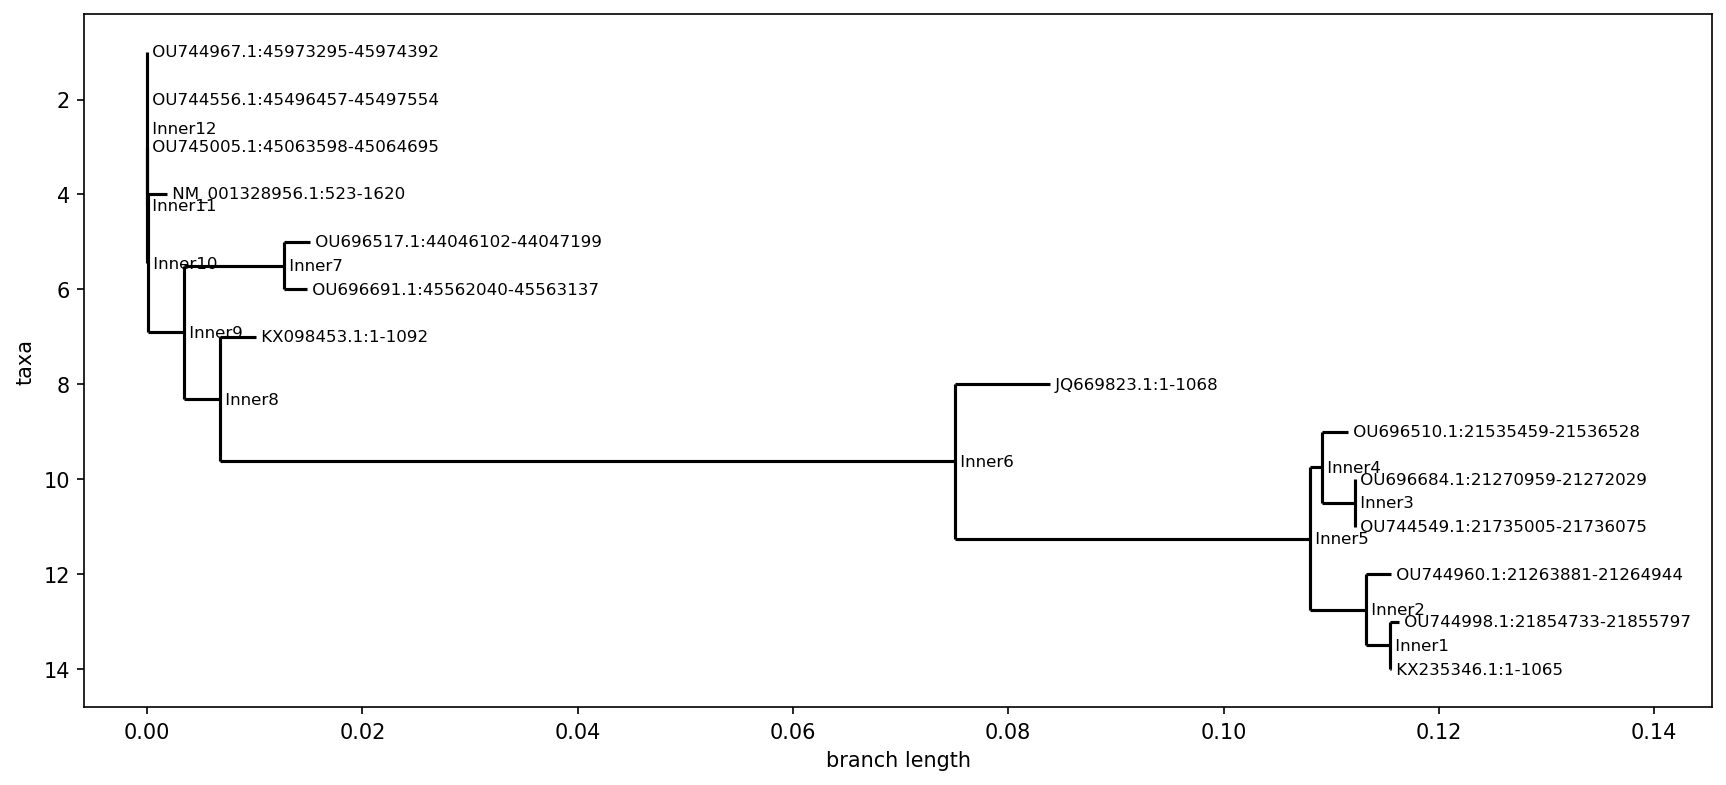

In [5]:
constructor = DistanceTreeConstructor(calculate_var)
#build tree variable based on aligned sequences
tree = constructor.build_tree(alignment_var)
#write tree to xml file
Phylo.write(tree, "tree.xml", "phyloxml")
#format the display of the phylogenetic tree
fig = plt.figure(figsize=(14, 6), dpi=150)
#define plot axes
axes = fig.add_subplot(1, 1, 1)
#change font size of nodes and leaves
matplotlib.rc('font', size=8)
#change font size of x tick labels
matplotlib.rc('xtick', labelsize=8) 
#change font size of y tick labels
matplotlib.rc('ytick', labelsize=8)
#organize tree structure by rotating inner nodes to achieve one side with greater # of species or clusters
tree.ladderize()
#make the tree
Phylo.draw(tree, axes=axes)
#save a copy of the generated tree
fig.savefig("tree_drawing.png")



#### Compare the DNA Sequence Lengths of the Gene Variants. This analysis could give plant breeders some insight into possible size differences of variant analogous proteins in a specific round of breeding. Different size proteins could produce different phenotypical effects.  

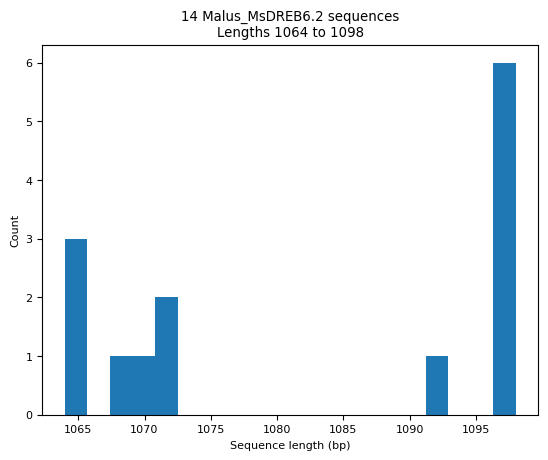

In [6]:
#define list as each item (seq) length
sizes = [len(item) for item in SeqIO.parse(fastaFile, "fasta")]
#define size of histogram in pylab
pylab.hist(sizes, bins=20)
#add title, and label axes
pylab.title(
    "%i Malus_MsDREB6.2 sequences\nLengths %i to %i" % (len(sizes), min(sizes), max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
#make a copy
pylab.savefig("DNAseqlengths.png")


### References

####  Liao, X., Guo, X., Wang, Q., Wang, Y., Zhao, D., Yao, L., Wang, S., Liu, G., & Li, T. (2017). Overexpression of MsDREB6.2 results in cytokinin-deficient developmental phenotypes and enhances drought tolerance in transgenic apple plants. The Plant Journal: For Cell and Molecular Biology, 89(3), 510–526. https://doi.org/10.1111/tpj.13401









